In [1]:
import numpy as np
from scipy.interpolate import lagrange
from matplotlib_inline import backend_inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
# sns.set_palette('pastel')
backend_inline.set_matplotlib_formats('svg')

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
def f(x):
    return 1 / (1 + 25 * x**2)

In [3]:
x = np.linspace(-1, 1, 10000)

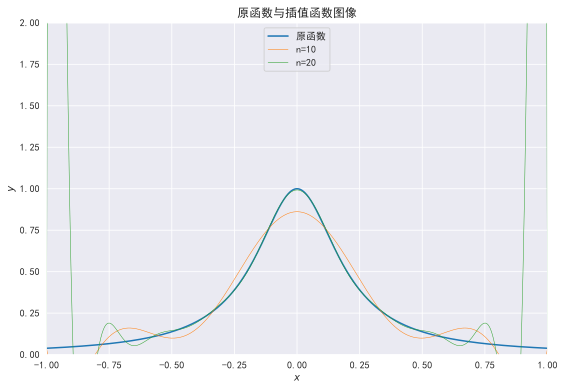

In [4]:
fig = plt.figure(figsize=(9, 6))
plt.xlim(-1, 1)
plt.ylim(0, 2)
plt.plot(x, f(x), label=r'原函数', lw=1.5)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('原函数与插值函数图像')
for i in [9, 19]:
    x1 = np.linspace(-1, 1, i + 1)
    func = np.poly1d(lagrange(x1, f(x1)))
    plt.plot(x, func(x), lw=0.5, label=f'n={i + 1}')
plt.legend(loc='upper center', fontsize=10)
plt.savefig(r'D:\PyCharm\PyPrograms\PyMath\data\img1.svg', dpi=1000)

In [5]:
import altair as alt
import numpy as np
from scipy.interpolate import lagrange
import pandas as pd

In [6]:
data = pd.DataFrame({
    'x': x,
    'f(x)': f(x),
    'n=10': np.poly1d(lagrange(np.linspace(-1, 1, 10), f(np.linspace(-1, 1, 10))))(x),
    'n=20': np.poly1d(lagrange(np.linspace(-1, 1, 20), f(np.linspace(-1, 1, 20))))(x)
})

In [7]:
data.head()

,x,f(x),n=10,n=20
0,-1.0000,0.038462,0.038462,0.038461
1,-0.9998,0.038476,0.036486,0.196626
2,-0.9996,0.038491,0.034519,0.352784
3,-0.9994,0.038506,0.032561,0.506952
4,-0.9992,0.038521,0.030611,0.659145


In [8]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [9]:
# alt.Scale(-1, 1)

In [10]:
chart1 = alt.Chart(data).mark_line(color='red', clip=True).encode(
    x = 'x', y=alt.Y('f(x)', axis=alt.Axis(title='y'), scale=alt.Scale(domain=(0, 1.5)))
)

chart2 = alt.Chart(data).mark_line(color='blue', clip=True).encode(
    x = 'x', y=alt.Y('n=10', axis=alt.Axis(title='y'), scale=alt.Scale(domain=(0, 1.5)))
)

chart3 = alt.Chart(data).mark_line(color='green', clip=True).encode(
    x = 'x', y=alt.Y('n=20', axis=alt.Axis(title='y'), scale=alt.Scale(domain=(0, 1.5)))
)

In [11]:
alt.layer(chart1, chart2, chart3).properties(
    width=900, height=600, title=alt.TitleParams(text='原函数与插值函数图像', font='楷体', fontSize=30)
)

alt.LayerChart(...)

In [13]:
chart = alt.Chart(data).mark_line(clip=True).transform_fold(
    fold=['f(x)', 'n=10', 'n=20'],
    as_=['category', 'y']
).encode(
    alt.X('x:Q'),
    alt.Y('y:Q', scale=alt.Scale(domain=(0, 1.5))),
    color=alt.Color('category:N', scale=alt.Scale(scheme=alt.SchemeParams(name='rainbow', extent=[0.5, 1.5])))
).properties(
    width=900, height=600, title=alt.TitleParams(text='原函数与插值函数图像', font='楷体', fontSize=30)
)

chart.configure_legend(
    padding=20,
    titlePadding=15,
    cornerRadius=30,
    labelFontSize=15, labelFont='consolas',
    titleFontSize=20, titleFont='consolas',
    orient='top'
)

alt.Chart(...)